# Factors Affecting Cars Mileage

In [1]:
#Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
df = pd.read_csv('fuel_economy.csv')

In [3]:
df.shape

(1276, 11)

In [4]:
df.describe()

,Cylinders,Valves_Per_Cylinder
count,1210.000000,1174.000000
mean,4.380992,3.977853
std,1.660957,0.833763
min,2.000000,1.000000
25%,4.000000,4.000000
50%,4.000000,4.000000
75%,4.000000,4.000000
max,16.000000,16.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Displacement            1264 non-null   object 
 1   Cylinders               1210 non-null   float64
 2   Valves_Per_Cylinder     1174 non-null   float64
 3   Cylinder_Configuration  1263 non-null   object 
 4   Fuel_System             1268 non-null   object 
 5   Fuel_Tank_Capacity      1207 non-null   object 
 6   Fuel_Type               1276 non-null   object 
 7   Emission_Norm           1265 non-null   object 
 8   Start_/_Stop_Button     598 non-null    object 
 9   ARAI_Certified_Mileage  1162 non-null   object 
 10  Ex-Showroom_Price       1276 non-null   object 
dtypes: float64(2), object(9)
memory usage: 109.8+ KB


In [6]:
df.head(3)

,Displacement,Cylinders,Valves_Per_Cylinder,Cylinder_Configuration,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Emission_Norm,Start_/_Stop_Button,ARAI_Certified_Mileage,Ex-Showroom_Price
0,624 cc,2.0,2.0,In-line,Injection,24 litres,Petrol,BS IV,Yes,23.6 km/litre,"Rs. 2,92,667"
1,624 cc,2.0,2.0,In-line,Injection,24 litres,Petrol,BS IV,NaN,23.6 km/litre,"Rs. 2,36,447"
2,624 cc,2.0,2.0,In-line,Injection,15 litres,CNG,BS IV,NaN,NaN,"Rs. 2,96,661"


# Data Wrangling 

In [7]:
df.isnull().sum()

Displacement               12
Cylinders                  66
Valves_Per_Cylinder       102
Cylinder_Configuration     13
Fuel_System                 8
Fuel_Tank_Capacity         69
Fuel_Type                   0
Emission_Norm              11
Start_/_Stop_Button       678
ARAI_Certified_Mileage    114
Ex-Showroom_Price           0
dtype: int64

In [8]:
df['Displacement'].value_counts()

1197 cc    108
1498 cc     87
1248 cc     62
1198 cc     58
1497 cc     56
          ... 
5935 cc      1
2400 cc      1
3855 cc      1
2982 cc      1
2360 cc      1
Name: Displacement, Length: 129, dtype: int64

In [9]:
a = ((df['Displacement'].isnull().sum())/df['Displacement'].value_counts().sum())*100
print("Percentage of null variables in column Displacement is ", a)

Percentage of null variables in column Displacement is  0.949367088607595


The number of null values in the 'Displacement' feature is very small thus rather than deleting the rows it is more preferable to fill the variables with the mode of 'Displacement'.

In [10]:
df['Displacement'] = df['Displacement'].fillna('1197 cc')

In [11]:
df['Displacement'] = df['Displacement'].str.replace(' cc','',regex=False)
df.Displacement = df.Displacement.astype(int)

In [12]:
df['Cylinders'].value_counts()

4.0     789
3.0     213
6.0     106
8.0      53
12.0     21
10.0     10
5.0      10
2.0       6
16.0      2
Name: Cylinders, dtype: int64

In [13]:
b = ((df['Cylinders'].isnull().sum())/df['Cylinders'].value_counts().sum())*100
print("Percentage of null variables in column Cylinders is ", b)

Percentage of null variables in column Cylinders is  5.454545454545454


In [14]:
df['Cylinders'] = df['Cylinders'].fillna(4.0)

In [15]:
df['Valves_Per_Cylinder'].value_counts()

4.0     1113
2.0       46
12.0       4
8.0        4
16.0       2
3.0        2
1.0        2
6.0        1
Name: Valves_Per_Cylinder, dtype: int64

In [16]:
c = ((df['Valves_Per_Cylinder'].isnull().sum())/df['Valves_Per_Cylinder'].value_counts().sum())*100
print("Percentage of null variables in column Valves_Per_Cylinder is ", c)

Percentage of null variables in column Valves_Per_Cylinder is  8.68824531516184


In [17]:
df['Valves_Per_Cylinder'] = df['Valves_Per_Cylinder'].fillna(1113)

In [18]:
df['Cylinder_Configuration'].value_counts()

In-line    1077
V           176
W             6
Flat          4
Name: Cylinder_Configuration, dtype: int64

In [19]:
d = ((df['Cylinder_Configuration'].isnull().sum())/df['Cylinder_Configuration'].value_counts().sum())*100
print("Percentage of null variables in column Cylinder_Configuration is ", d)

Percentage of null variables in column Cylinder_Configuration is  1.0292953285827395


In [20]:
df['Cylinder_Configuration']=df['Cylinder_Configuration'].fillna('In-line')

In [21]:
df["Cylinder_Configuration"]=np.where(df["Cylinder_Configuration"]==('In-line'),1,df["Cylinder_Configuration"])
df["Cylinder_Configuration"]=np.where(df["Cylinder_Configuration"]==('V'),2,df["Cylinder_Configuration"])
df["Cylinder_Configuration"]=np.where(df["Cylinder_Configuration"]==('W'),3,df["Cylinder_Configuration"])
df["Cylinder_Configuration"]=np.where(df["Cylinder_Configuration"]==('Flat'),4,df["Cylinder_Configuration"])

In [22]:
df['Fuel_System'].value_counts()

Injection    1264
PGM - Fi        4
Name: Fuel_System, dtype: int64

In [23]:
e = ((df['Fuel_System'].isnull().sum())/df['Fuel_System'].value_counts().sum())*100
print("Percentage of null variables in column Fuel_System is ", d)

Percentage of null variables in column Fuel_System is  1.0292953285827395


In [24]:
df['Fuel_System']=df['Fuel_System'].fillna('Injection')

In [25]:
df["Fuel_System"]=np.where(df["Fuel_System"]==('Injection'),1,df["Fuel_System"])
df["Fuel_System"]=np.where(df["Fuel_System"]==('PGM - Fi'),2,df["Fuel_System"])

In [26]:
df['Fuel_Tank_Capacity'].value_counts()

45 litres      125
35 litres      124
50 litres       94
60 litres       91
37 litres       79
              ... 
36 litres        1
60.9 litres      1
87 litres        1
67.5 litres      1
72 litres        1
Name: Fuel_Tank_Capacity, Length: 63, dtype: int64

In [27]:
e = ((df['Fuel_Tank_Capacity'].isnull().sum())/df['Fuel_Tank_Capacity'].value_counts().sum())*100
print("Percentage of null variables in column Fuel_Tank_Capacity is ", e)

Percentage of null variables in column Fuel_Tank_Capacity is  5.716652858326429


In [28]:
df['Fuel_Tank_Capacity']=df['Fuel_Tank_Capacity'].fillna('45 litres')

In [29]:
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace(' litres','',regex=False).astype(float)

In [30]:
df['Emission_Norm'].value_counts()

BS IV     879
BS 6      358
BS VI      19
BS III      9
Name: Emission_Norm, dtype: int64

In [31]:
f = ((df['Emission_Norm'].isnull().sum())/df['Emission_Norm'].value_counts().sum())*100
print("Percentage of null variables in column Emission_Norm is ", f)

Percentage of null variables in column Emission_Norm is  0.8695652173913043


In [32]:
df['Emission_Norm']=df['Emission_Norm'].fillna('BS IV')

In [33]:
df["Emission_Norm"]=np.where(df["Emission_Norm"]==('BS IV'),1,df["Emission_Norm"])
df["Emission_Norm"]=np.where(df["Emission_Norm"]==('BS 6'),2,df["Emission_Norm"])
df["Emission_Norm"]=np.where(df["Emission_Norm"]==('BS VI'),3,df["Emission_Norm"])
df["Emission_Norm"]=np.where(df["Emission_Norm"]==('BS III'),4,df["Emission_Norm"])

In [34]:
df['ARAI_Certified_Mileage'].value_counts()

23 km/litre       27
17.1 km/litre     24
16 km/litre       24
17.6 km/litre     23
23.1 km/litre     20
                  ..
21.2 km/litre      1
3.4 km/litre       1
21.19 km/litre     1
18.8 km/litre      1
8.9 km/litre       1
Name: ARAI_Certified_Mileage, Length: 281, dtype: int64

In [35]:
df['ARAI_Certified_Mileage']=df['ARAI_Certified_Mileage'].fillna('10')

In [36]:
df.loc[df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '22.4-21.9 km/litre','ARAI_Certified_Mileage'] = '20'
df.loc[df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(' km/litre','',regex=False).astype(float)

<AxesSubplot:xlabel='ARAI_Certified_Mileage'>

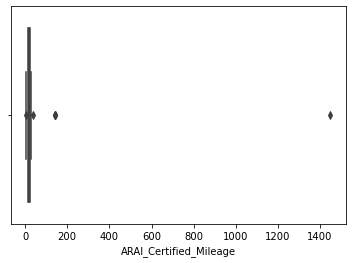

In [37]:
sns.boxplot(x='ARAI_Certified_Mileage', data=df)

'ARAI_Certified-Mileage' column has some outliers and to understand the right value to replace null values, it is important to understand the skewness of variable thus it s important to remove outliers.

In [38]:
#Removing outliers from 'ARAI_Certified_Mileage' column
for x in ['ARAI_Certified_Mileage']:
    q75,q25 = np.percentile(df.loc[:,x],[75,5])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

<AxesSubplot:xlabel='ARAI_Certified_Mileage'>

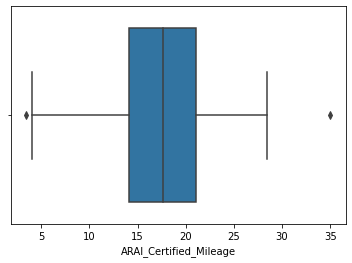

In [39]:
sns.boxplot(x='ARAI_Certified_Mileage', data=df)

<AxesSubplot:xlabel='ARAI_Certified_Mileage', ylabel='Density'>

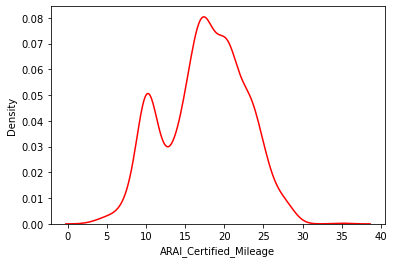

In [40]:
sns.kdeplot(x='ARAI_Certified_Mileage', data=df, color='red')
#plt.savefig('kdeplot.png')

In [41]:
df['ARAI_Certified_Mileage'].mean()

17.50370574350903

In [42]:
df['ARAI_Certified_Mileage'].isnull().sum()

5

In [43]:
df['ARAI_Certified_Mileage']=df['ARAI_Certified_Mileage'].fillna(17.50)

In [44]:
df['Fuel_Type'].value_counts()

Petrol          643
Diesel          582
CNG              16
Hybrid           15
Electric         14
CNG + Petrol      6
Name: Fuel_Type, dtype: int64

In [45]:
df["Fuel_Type"]=np.where(df["Fuel_Type"]==('Petrol'),1,df["Fuel_Type"])
df["Fuel_Type"]=np.where(df["Fuel_Type"]==('Diesel'),2,df["Fuel_Type"])
df["Fuel_Type"]=np.where(df["Fuel_Type"]==('CNG'),3,df["Fuel_Type"])
df["Fuel_Type"]=np.where(df["Fuel_Type"]==('Hybrid'),4,df["Fuel_Type"])
df["Fuel_Type"]=np.where(df["Fuel_Type"]==('Electric'),5,df["Fuel_Type"])
df["Fuel_Type"]=np.where(df["Fuel_Type"]==('CNG + Petrol'),6,df["Fuel_Type"])

In [46]:
df['Start_/_Stop_Button'].value_counts()

Yes    598
Name: Start_/_Stop_Button, dtype: int64

In [47]:
df['Start_/_Stop_Button']=np.where(df['Start_/_Stop_Button']==('Yes'),1,df['Start_/_Stop_Button'])
df['Start_/_Stop_Button']=df['Start_/_Stop_Button'].fillna(0)

In [48]:
df.Cylinder_Configuration = df.Cylinder_Configuration.astype(int)
df.Fuel_System = df.Fuel_System.astype(int)
df.Fuel_Type = df.Fuel_Type.astype(int)
df.Emission_Norm = df.Emission_Norm.astype(int)

In [49]:
df.head()

,Displacement,Cylinders,Valves_Per_Cylinder,Cylinder_Configuration,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Emission_Norm,Start_/_Stop_Button,ARAI_Certified_Mileage,Ex-Showroom_Price
0,624,2.0,2.0,1,1,24.0,1,1,1,23.6,"Rs. 2,92,667"
1,624,2.0,2.0,1,1,24.0,1,1,0,23.6,"Rs. 2,36,447"
2,624,2.0,2.0,1,1,15.0,3,1,0,10.0,"Rs. 2,96,661"
3,624,2.0,2.0,1,1,24.0,1,1,1,21.9,"Rs. 3,34,768"
4,624,2.0,2.0,1,1,24.0,1,1,0,23.6,"Rs. 2,72,223"


In [50]:
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].astype(int)
df['price'] = df['Ex-Showroom_Price'] * 0.014
df.drop(columns='Ex-Showroom_Price', inplace= True)

In [51]:
ds=df

In [52]:
df=df.drop(columns='price')

# Bivariant Analysis

In [53]:
corr=df.corr()
corr

,Displacement,Cylinders,Valves_Per_Cylinder,Cylinder_Configuration,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Emission_Norm,Start_/_Stop_Button,ARAI_Certified_Mileage
Displacement,1.000000,0.877429,-0.081985,0.667071,0.245044,0.729850,-0.075529,-0.101201,0.324507,-0.538997
Cylinders,0.877429,1.000000,-0.022942,0.720093,0.333863,0.635350,-0.106429,-0.089163,0.306491,-0.466392
Valves_Per_Cylinder,-0.081985,-0.022942,1.000000,-0.043138,-0.016525,-0.019801,0.193871,0.182452,0.018757,-0.052099
Cylinder_Configuration,0.667071,0.720093,-0.043138,1.000000,0.258101,0.593391,-0.090581,-0.022752,0.287326,-0.441780
Fuel_System,0.245044,0.333863,-0.016525,0.258101,1.000000,0.046257,-0.043586,0.017435,0.059710,-0.084190
Fuel_Tank_Capacity,0.729850,0.635350,-0.019801,0.593391,0.046257,1.000000,0.037787,-0.175125,0.374784,-0.584432
Fuel_Type,-0.075529,-0.106429,0.193871,-0.090581,-0.043586,0.037787,1.000000,-0.013419,-0.031665,-0.014287
Emission_Norm,-0.101201,-0.089163,0.182452,-0.022752,0.017435,-0.175125,-0.013419,1.000000,0.060160,-0.019970
Start_/_Stop_Button,0.324507,0.306491,0.018757,0.287326,0.059710,0.374784,-0.031665,0.060160,1.000000,-0.249514
ARAI_Certified_Mileage,-0.538997,-0.466392,-0.052099,-0.441780,-0.084190,-0.584432,-0.014287,-0.019970,-0.249514,1.000000


<AxesSubplot:>

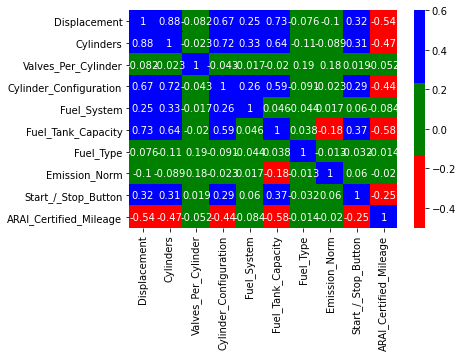

In [54]:
sns.heatmap(corr, cmap=['red','green','blue'], vmin=-0.5, vmax=0.6, annot=True)

Through the above correlation plot, 'Displacement', 'Cylinders', 'Fuel_Tank_Capacity' and 'Start_/_Stop_Button' are the feature that has better correlation as compared to the other independent specification variables under consideration.

# Model Training 

In [55]:
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm  
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LinearRegression

In [56]:
train, test = train_test_split(df, test_size = 0.3)
print(train.shape)
print(test.shape)

(893, 10)
(383, 10)


In [57]:
df['Cylinders']=df['Cylinders'].astype(int)

In [58]:
train_X = train[['Displacement', 'Cylinders', 'Fuel_Tank_Capacity', 'Cylinder_Configuration']]
train_y=train.ARAI_Certified_Mileage
test_X= test[['Displacement', 'Cylinders', 'Fuel_Tank_Capacity','Cylinder_Configuration']]
test_y =test.ARAI_Certified_Mileage

In [59]:
train_X.head(10)

,Displacement,Cylinders,Fuel_Tank_Capacity,Cylinder_Configuration
955,1493,3.0,60.0,1
1224,1248,4.0,45.0,1
304,2979,6.0,52.0,1
1008,1197,4.0,45.0,1
1103,1598,4.0,55.0,1
98,1364,4.0,45.0,1
850,2995,6.0,85.0,2
101,1198,3.0,41.0,1
1194,1493,3.0,60.0,1
961,1461,4.0,50.0,1


In [60]:
train_y.head(2)

955     18.49
1224    21.20
Name: ARAI_Certified_Mileage, dtype: float64

In [61]:
model = LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [62]:
model.predict([[1200, 3.0, 44.0, 1]])

array([19.26110154])

In [63]:
test_acc = model.score(train_X,train_y)
test_acc*100
print("Accuracy of model is ",test_acc*100)

Accuracy of model is  37.68868428409099


In [64]:
print(test_y)

836     11.50
164     28.40
249     20.38
672     16.00
671     16.00
        ...  
754     13.70
806     10.00
559     23.00
753     14.67
1102    26.32
Name: ARAI_Certified_Mileage, Length: 383, dtype: float64


# Saving Model

In [65]:
import pickle

In [66]:
pickle.dump(model, open('Mileage_Pred_Model.pkl','wb'))

# Saving Dataset

In [67]:
ds.to_csv('out2.csv')

In [68]:
ds.head(1)

,Displacement,Cylinders,Valves_Per_Cylinder,Cylinder_Configuration,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Emission_Norm,Start_/_Stop_Button,ARAI_Certified_Mileage,price
0,624,2.0,2.0,1,1,24.0,1,1,1,23.6,4097.338


In [69]:
dp=ds[['Torque', 'Power', 'ARAI_Certified_Mileage', 'Price']]

KeyError: "['Price', 'Torque', 'Power'] not in index"

# Plotting Graphs

In [ ]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.kdeplot(df['ARAI_Certified_Mileage'], color='green', shade=True)
plt.title("KDE plot of ARAI Certified Mileage")
plt.savefig('displacement.jpg')

In [ ]:
sns.set_style("dark")
sns.kdeplot(df['Displacement'], df['ARAI_Certified_Mileage'], cmap="Reds", shade=True, bw=.15)
plt.title("ARAI Certified Mileage v/s Displacement")
plt.savefig('disVSmil.jpg')

In [ ]:
sns.set_style("dark")
sns.kdeplot(df['Fuel_Tank_Capacity'], df['ARAI_Certified_Mileage'], cmap="Blues", shade=True, bw=.15)
plt.title("ARAI Certified Mileage v/s Fuel_Tank_Capacity")
plt.savefig('fuelVSmil.jpg')

In [ ]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.barplot(x='Cylinders', y='ARAI_Certified_Mileage', data=df, palette='magma')
plt.title("ARAI Certified Mileage v/s Cylinders Count")
plt.savefig('CylVSmil.jpg')

In [ ]:
sns.lineplot(x='Cylinder_Configuration', y='ARAI_Certified_Mileage',color='yellow', data=df)
plt.title("ARAI Certified Mileage v/s Cylinder Configuration")
plt.savefig('Cyl_ConVSmil.jpg')